<a href="https://colab.research.google.com/github/Haeshitha4567/weaather/blob/main/weatherprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import io
from google.colab import files
uploaded=files.upload()

Saving seattle-weather.csv to seattle-weather (1).csv


In [10]:
df=pd.read_csv(io.BytesIO(uploaded['seattle-weather.csv']))
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [11]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df[df['date'].dt.year==2015]
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
1096,2015-01-01,0.0,5.6,-3.2,1.2,sun
1097,2015-01-02,1.5,5.6,0.0,2.3,rain
1098,2015-01-03,0.0,5.0,1.7,1.7,fog
1099,2015-01-04,10.2,10.6,3.3,4.5,rain
1100,2015-01-05,8.1,12.2,9.4,6.4,rain


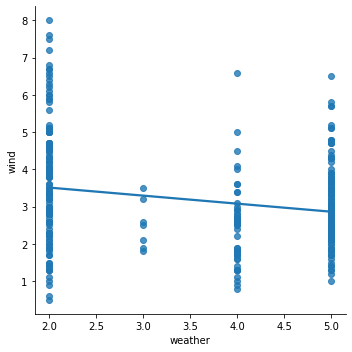

In [12]:
df.replace(to_replace ="rain", value = 2, inplace = True)
df.replace(to_replace ="drizzle", value = 3, inplace = True)
df.replace(to_replace ="fog", value = 4, inplace = True)
df.replace(to_replace ="sun", value = 5, inplace = True)
df.replace(to_replace ="snow", value = 1, inplace = True)
sns.lmplot(x='weather',y='wind', data=df, ci=None)

In [14]:
len(df)
df.columns
df = df.drop(columns=['date'])
X=df.drop(columns=['weather'])
y=df['weather']
X

,precipitation,temp_max,temp_min,wind
1096,0.0,5.6,-3.2,1.2
1097,1.5,5.6,0.0,2.3
1098,0.0,5.0,1.7,1.7
1099,10.2,10.6,3.3,4.5
1100,8.1,12.2,9.4,6.4
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [15]:
y

1096    5
1097    2
1098    4
1099    2
1100    2
       ..
1456    2
1457    2
1458    4
1459    5
1460    5
Name: weather, Length: 365, dtype: int64

In [20]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [21]:
model.score(X,y)

0.4507890314749492

In [22]:
model.intercept_

2.241774692338148

In [23]:
model.coef_

array([-0.0542301 ,  0.1809567 , -0.18299921,  0.00832554])

In [24]:
model.predict([[10,5,5,5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.73088884])

In [25]:
X_test = df.drop(columns=['weather'])
X_test

,precipitation,temp_max,temp_min,wind
1096,0.0,5.6,-3.2,1.2
1097,1.5,5.6,0.0,2.3
1098,0.0,5.0,1.7,1.7
1099,10.2,10.6,3.3,4.5
1100,8.1,12.2,9.4,6.4
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [26]:
y_hat = model.predict(X_test)
y_hat

array([3.85072032, 3.1929358 , 2.84961296, 3.04033622, 2.34327352,
       3.34397449, 2.64176227, 3.3637847 , 3.43617061, 2.22656998,
       2.55298634, 3.45851843, 3.45284885, 3.25912255, 2.95254756,
       3.37163746, 2.64708427, 2.33932593, 2.931243  , 3.47242093,
       3.64698574, 2.79391164, 2.63766484, 2.81661922, 4.04829142,
       4.0571986 , 2.70476766, 3.54943638, 3.86969312, 3.54907661,
       2.95658408, 3.07787242, 2.96739744, 2.97186554, 2.91333977,
       1.74707421, 2.11684329, 1.48772098, 3.27447303, 2.81961563,
       3.05616017, 3.54155045, 3.50681259, 3.85275796, 3.62933153,
       3.77571212, 3.9862782 , 4.38328322, 3.66589633, 2.40988003,
       2.89690869, 3.46211581, 3.79003797, 4.45987669, 3.86028412,
       2.61122914, 2.43346708, 1.86613831, 3.8880093 , 4.06741113,
       3.48516014, 4.17739935, 4.66450603, 4.14692423, 4.36388358,
       4.57253364, 4.65468646, 4.05734065, 3.7117651 , 3.10909217,
       3.76925315, 3.83669212, 2.14660561, 0.04712514, 3.61152

In [27]:
dc=pd.concat([df.reset_index(),pd.Series(y_hat,name='predicted')], axis = 'columns')
dc

,index,precipitation,temp_max,temp_min,wind,weather,predicted
0,1096,0.0,5.6,-3.2,1.2,5,3.850720
1,1097,1.5,5.6,0.0,2.3,2,3.192936
2,1098,0.0,5.0,1.7,1.7,4,2.849613
3,1099,10.2,10.6,3.3,4.5,2,3.040336
4,1100,8.1,12.2,9.4,6.4,2,2.343274
...,...,...,...,...,...,...,...
360,1456,8.6,4.4,1.7,2.9,2,2.284651
361,1457,1.5,5.0,1.7,1.3,2,2.764938
362,1458,0.0,7.2,0.6,2.6,4,3.456510
363,1459,0.0,5.6,-1.0,3.4,5,3.466438
